<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [222]:
pip install nsepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [223]:
import nsepy
from nsepy import get_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

In [224]:
today=date.today()
data = get_history(symbol="ZOMATO",
                        start=today - timedelta(days=2*365),
                        end=today
#                       index_col='Date',parse_dates=True
                       )

In [225]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2022-08-17,ZOMATO,EQ,64.25,64.8,65.60,61.80,65.30,65.25,63.69,258066522,1.643583e+15,348652,76269708,0.2955
2022-08-18,ZOMATO,EQ,65.25,65.6,69.25,65.00,66.65,67.10,67.49,303566868,2.048622e+15,412117,86379133,0.2845
2022-08-19,ZOMATO,EQ,67.10,67.4,68.25,60.15,61.30,61.45,63.38,295737752,1.874394e+15,510653,83280440,0.2816
2022-08-22,ZOMATO,EQ,61.45,61.0,62.85,59.25,62.45,62.00,61.32,226773007,1.390576e+15,350276,38020392,0.1677
2022-08-23,ZOMATO,EQ,62.00,62.3,65.25,62.15,63.95,64.45,63.65,218585102,1.391313e+15,255044,74190848,0.3394


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 2021-07-23 to 2022-08-23
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              270 non-null    object 
 1   Series              270 non-null    object 
 2   Prev Close          270 non-null    float64
 3   Open                270 non-null    float64
 4   High                270 non-null    float64
 5   Low                 270 non-null    float64
 6   Last                270 non-null    float64
 7   Close               270 non-null    float64
 8   VWAP                270 non-null    float64
 9   Volume              270 non-null    object 
 10  Turnover            270 non-null    float64
 11  Trades              270 non-null    object 
 12  Deliverable Volume  270 non-null    object 
 13  %Deliverble         270 non-null    float64
dtypes: float64(9), object(5)
memory usage: 31.6+ KB


In [227]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Turnover,%Deliverble
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2.700000e+02,270.000000
mean,101.916481,102.431111,104.748148,99.467963,101.868333,101.873704,102.006667,5.264205e+14,0.333059
std,35.254637,35.446465,36.018898,34.576126,35.278931,35.293187,35.310998,7.860064e+14,0.132020
min,41.650000,40.850000,44.400000,40.600000,41.600000,41.650000,43.290000,5.375542e+13,0.079300
25%,69.512500,68.800000,70.862500,65.575000,68.962500,69.125000,68.540000,1.566895e+14,0.241075
50%,92.450000,93.975000,95.475000,90.700000,92.375000,92.450000,93.315000,2.632948e+14,0.323050
75%,135.950000,136.475000,138.900000,133.000000,136.187500,135.950000,136.277500,5.536027e+14,0.414825
max,160.300000,161.150000,169.000000,154.250000,161.200000,160.300000,161.420000,8.625275e+15,0.685400


In [228]:
data.nunique()

Symbol                  1
Series                  1
Prev Close            245
Open                  227
High                  234
Low                   226
Last                  240
Close                 244
VWAP                  262
Volume                270
Turnover              270
Trades                270
Deliverable Volume    270
%Deliverble           261
dtype: int64

# EDA

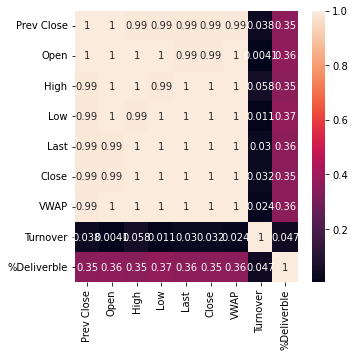

In [229]:
corr_matrix = data.corr().abs()
plt.figure(figsize=(5,5))
ax = sns.heatmap(corr_matrix,annot=True)

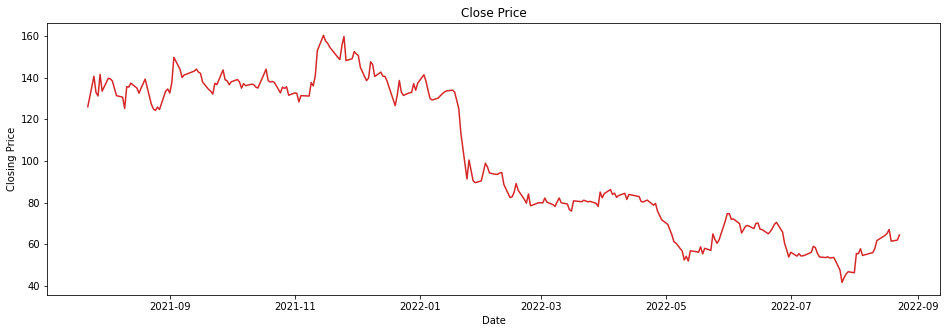

In [230]:
plt.figure(figsize=(16,5))
plt.plot(data.index, data.Close, color='tab:red')
plt.gca().set(title='Close Price', xlabel='Date', ylabel='Closing Price')
plt.show()

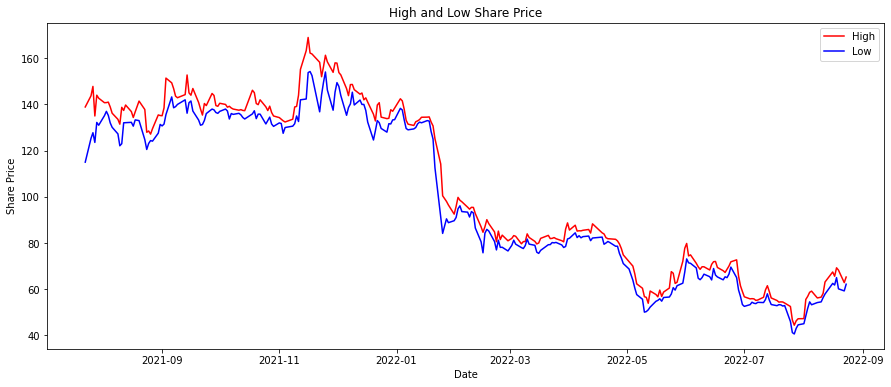

In [231]:

fig, ax = plt.subplots(figsize=(15,6))
#ax.set_facecolor('#000041')
ax.plot(data['High'], color='red', label='High')
plt.plot(data['Low'], color='blue', label='Low')
plt.gca().set(title='High and Low Share Price', xlabel='Date', ylabel='Share Price')
plt.legend()
plt.show()

In [232]:

X=data.drop(labels=['Symbol','Series','Close','Volume','Turnover','%Deliverble','Trades','Deliverable Volume'], axis=1)
y=data['Close']

In [233]:
X

,Prev Close,Open,High,Low,Last,VWAP
Date,,,,,,
2021-07-23,76.00,116.00,138.90,115.00,125.30,124.12
2021-07-26,126.00,126.35,143.75,125.30,138.05,134.63
2021-07-27,140.65,141.70,147.80,127.75,130.65,141.09
2021-07-28,132.90,131.00,135.00,123.55,133.00,127.90
2021-07-29,131.20,134.95,144.00,132.20,142.25,137.73
...,...,...,...,...,...,...
2022-08-17,64.25,64.80,65.60,61.80,65.30,63.69
2022-08-18,65.25,65.60,69.25,65.00,66.65,67.49
2022-08-19,67.10,67.40,68.25,60.15,61.30,63.38


In [234]:
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(data.Close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(data.Close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.775149788823823
p-value: 0.8263128782820943
Critial Values:
   1%, -3.4548957220044336
Critial Values:
   5%, -2.8723451788613157
Critial Values:
   10%, -2.572527778361272

KPSS Statistic: 1.512275
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [235]:
from statsmodels.tsa.arima_model import ARIMA

In [236]:
split_fraction = 0.80
train_split = int(split_fraction * int(data.shape[0]))
train_split

216

In [237]:
x=data.drop(labels=['Symbol','Series','Close','Volume','Turnover','%Deliverble','Trades','Deliverable Volume'], axis=1)
y=data['Close']
x_train=x[:train_split-1]
y_train=y[:train_split-1]
x_test=x[train_split:]
y_test=y[train_split:]

In [238]:
data1=data.drop(labels=['Symbol','Series','Volume','Turnover','%Deliverble','Trades','Deliverable Volume'], axis=1)
train=data1.Close[:train_split-1]
test=data1.Close[train_split:]

In [239]:
train.shape, test.shape

((215,), (54,))

In [240]:
model = ARIMA(train, order=(4, 2, 3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Close   No. Observations:                  213
Model:                 ARIMA(4, 2, 3)   Log Likelihood                -615.263
Method:                       css-mle   S.D. of innovations              4.256
Date:                Tue, 23 Aug 2022   AIC                           1248.526
Time:                        14:52:25   BIC                           1278.778
Sample:                             2   HQIC                          1260.752
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0034      0.004     -0.803      0.422      -0.012       0.005
ar.L1.D2.Close    -1.1187      0.074    -15.203      0.000      -1.263      -0.975
ar.L2.D2.Close    -1.0893      0.104

In [241]:
model = ARIMA(train, order=(5,1,2))
model_fit = model.fit(disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  214
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -616.031
Method:                       css-mle   S.D. of innovations              4.277
Date:                Tue, 23 Aug 2022   AIC                           1250.062
Time:                        14:52:27   BIC                           1280.356
Sample:                             1   HQIC                          1262.303
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2559      0.275     -0.930      0.352      -0.795       0.283
ar.L1.D.Close    -2.0126      0.070    -28.651      0.000      -2.150      -1.875
ar.L2.D.Close    -1.1645      0.156     

In [242]:
step=int(test.shape[0])


In [243]:
pred=model_fit.forecast(steps=step)[0]

In [244]:
Result=pd.DataFrame(columns=['Close','Predicted'])
Result['Close']=test
Result['Predicted']=pred


In [245]:
Result.head()

,Close,Predicted
Date,,
2022-06-07,65.40,71.791742
2022-06-08,67.15,71.843824
2022-06-09,68.70,70.932939
2022-06-10,69.00,71.542882
2022-06-13,67.50,70.283826


In [246]:
model_fit.aic

1250.061833832699

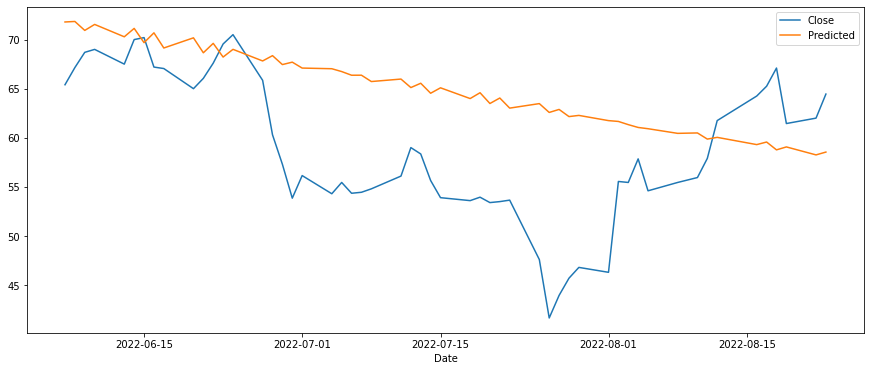

In [247]:
Result.plot(figsize=(15,6))

In [248]:
import numpy as np
#Mean Absolute Percentage Error 
mape = np.mean(np.abs(pred - test)/np.abs(test))
print("Mean Absolute Percentage Error ",mape)
print('Accuracy =',100-mape)

Mean Absolute Percentage Error  0.13995698716005653
Accuracy = 99.86004301283994


In [253]:
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]-1))
train.shape, x_train.shape, test.shape, x_test.shape

((215,), (215,), (54,), (54,))

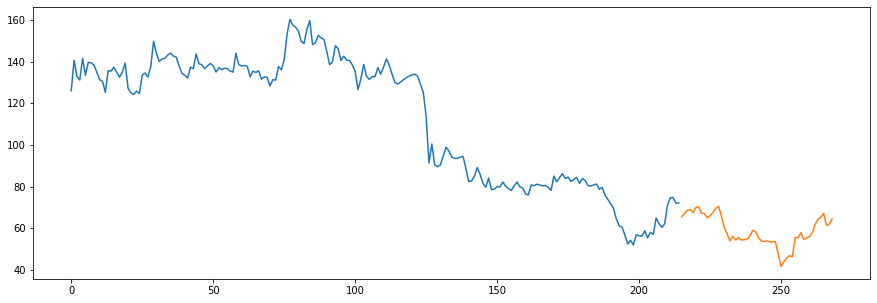

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)

ax.plot(x_test, test)